In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/jatin/Desktop/dlProject/data.csv')

In [5]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [6]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers


In [10]:
# Convert categorical variables to one-hot encoded features
categorical_features = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
numerical_features = ['Age', 'Income', 'Number of Children']


In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [12]:
X = preprocessor.fit_transform(df.drop('Credit Score', axis=1))
y = df['Credit Score']

In [13]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Convert target labels to one-hot encoded format
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

In [51]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer with 3 classes (High, Average, Low)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping])


Epoch 1/100
9/9 [==============================] - 1s 48ms/step - loss: 0.9065 - accuracy: 0.6260 - val_loss: 0.6774 - val_accuracy: 0.9394
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 0.5682 - accuracy: 0.9160 - val_loss: 0.4796 - val_accuracy: 0.8182
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3766 - accuracy: 0.9084 - val_loss: 0.3786 - val_accuracy: 0.8182
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2798 - accuracy: 0.9008 - val_loss: 0.3149 - val_accuracy: 0.7879
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2314 - accuracy: 0.9008 - val_loss: 0.2579 - val_accuracy: 0.8485
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1958 - accuracy: 0.9466 - val_loss: 0.2125 - val_accuracy: 0.9394
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1785 - accuracy: 0.9542 - val_loss: 0.1854 - val_accuracy: 0.9697
Epoch 8/100
9/9 [===

In [53]:

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val_encoded)
print("Validation accuracy:", accuracy)


2/2 [==============================] - 0s 8ms/step - loss: 0.0412 - accuracy: 1.0000
Validation accuracy: 1.0


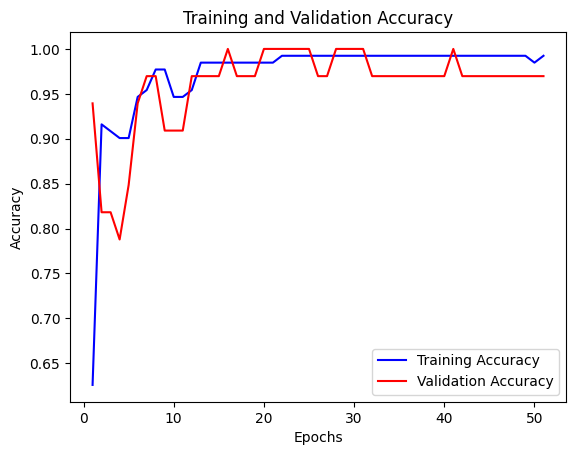

In [54]:
import matplotlib.pyplot as plt
# Get the training and validation accuracy history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot the accuracy history
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

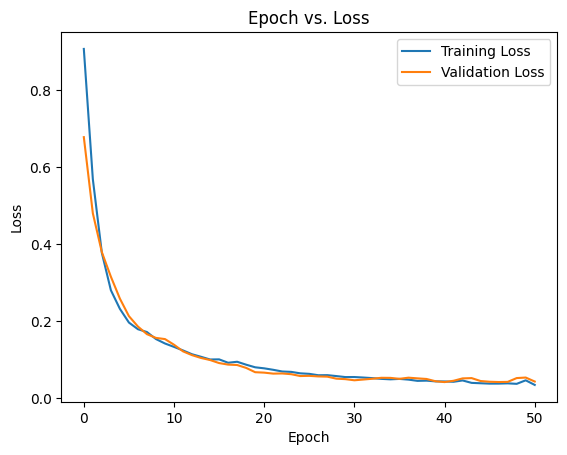

In [55]:
# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.legend()
plt.show()

In [56]:
# Load the test dataset
test_df = pd.read_csv('test.csv')  # Replace with the path to your test dataset

# Preprocess the test data
X_test = preprocessor.transform(test_df.drop('Credit Score', axis=1))

# Predict credit scores
predictions = model.predict(X_test)

# Convert predictions to original format
predicted_scores = np.argmax(predictions, axis=1)  # Get the index of the highest probability
score_mapping = {0: 'High', 1: 'Average', 2: 'Low'}
predicted_scores = [score_mapping[pred] for pred in predicted_scores]

# Compare predictions with actual credit scores
actual_scores = test_df['Credit Score'].tolist()

# Print the predictions and actual scores side by side
for i in range(len(predicted_scores)):
    print(f"Predicted: {predicted_scores[i]}, Actual: {actual_scores[i]}")


1/1 [==============================] - 0s 132ms/step
Predicted: Low, Actual: Low  
Predicted: Average, Actual: High
Predicted: Average, Actual: High  
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Low, Actual: Low
Predicted: High, Actual: Low  
Predicted: Average, Actual: High
Predicted: Average, Actual: High  
Predicted: Average, Actual: High
Predicted: Low, Actual: Low
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High  
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High
Predicted: Average, Actual: High


In [58]:
from sklearn.metrics import accuracy_score

# Load the test dataset
test_df = pd.read_csv('test.csv')  # Replace with the path to your test dataset

# Preprocess the test data
X_test = preprocessor.transform(test_df.drop('Credit Score', axis=1))

# Predict credit scores
predictions = model.predict(X_test)
predicted_scores = np.argmax(predictions, axis=1)  # Get the index of the highest probability

# Convert predictions to original format
score_mapping = {0: 'High', 1: 'Average', 2: 'Low'}
predicted_scores = [score_mapping[pred] for pred in predicted_scores]

# Extract actual scores from the test data
actual_scores = test_df['Credit Score'].tolist()

# Calculate accuracy
accuracy = accuracy_score(actual_scores, predicted_scores)

print("Accuracy:", accuracy)


1/1 [==============================] - 0s 49ms/step
Accuracy: 0.08695652173913043
